<a href="https://colab.research.google.com/github/ProteintechLab/Statistics/blob/main/images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
system('add-apt-repository -y ppa:cran/imagemagick')
system('apt-get update')
system("apt-get install libmagick++-dev")
install.packages("magick")
install.packages("cowplot")

#Install the packages, this may take a few minutes

In [ ]:
%%R
library(tidyverse)
library(cowplot)
library(magick)

In [ ]:
%%R
download.file("https://github.com/toryn13/Rexamples/blob/main/blot.png", "blot.png")

In [109]:
%%R
a<-image_read("blot.png")
a
#We have imported the image, now can see the image size

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      998    873 sRGB       FALSE   264424 59x59  


In [ ]:
%%R
a<-image_crop(a, geometry = "998x400+0+100")

#We are going to crop the image

#geometry = "480x250+0+0" is the crucial part. It specifies the cropping parameters.
#998x400: This defines the dimensions of the cropped region. 998 is the width, and 400 is the height, both in pixels.
#+0+100: This defines the offset of the top-left corner of the cropped region from the top-left corner of the original image.
#The first +0 is the x-offset (horizontal), and the second +100 is the y-offset (vertical).
#So, +0+100 means the cropped region starts at the very top-left corner of the original. +100 (y-offset): The cropped region starts 100 pixels below the original image's top edge.

In [31]:
%%R
a

#Modified image

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      998    873 sRGB       FALSE        0 59x59  


In [43]:
%%R
#In this example our image object is called "a"
a_text<-image_annotate(a, "Control and Treated", size = 35, gravity = "North", color = "white")
a_text<-image_annotate(a_text, "Crop from blot", size = 24, gravity = "south", color = "white")

image_write(a_text, path = "crop.png", format = "png")


#image_annotate() is a function from the magick package that adds text to an image.
#a is the image object to which you are adding the text (the cropped image from the previous code).
#"Control and Treated" is the text string you we adding
#size = 35 sets the font size of the text.
#gravity = "North" specifies the position of the text. "North" places the text at the top of the image.
#color = "white" sets the color of the text to white.
#The second line adds the text to the lower part of the image.

In [44]:
%%R
blot<-ggdraw() +
draw_image("crop.png")

#Write the new image

In [45]:
%%R
C1=seq(1:20)
C2=seq(1:20)
frame<-data.frame(C1,C2)
frame

#Here were are creating an empty graph

   C1 C2
1   1  1
2   2  2
3   3  3
4   4  4
5   5  5
6   6  6
7   7  7
8   8  8
9   9  9
10 10 10
11 11 11
12 12 12
13 13 13
14 14 14
15 15 15
16 16 16
17 17 17
18 18 18
19 19 19
20 20 20


In [103]:
%%R
graph<-frame%>%ggplot(aes(C1, C2))+theme_minimal()
#Create the graph

In [105]:
%%R
img<-a_text%>%image_draw()
blot2<-ggdraw()+draw_plot(graph)+draw_image(img)
#Add the image to the graph

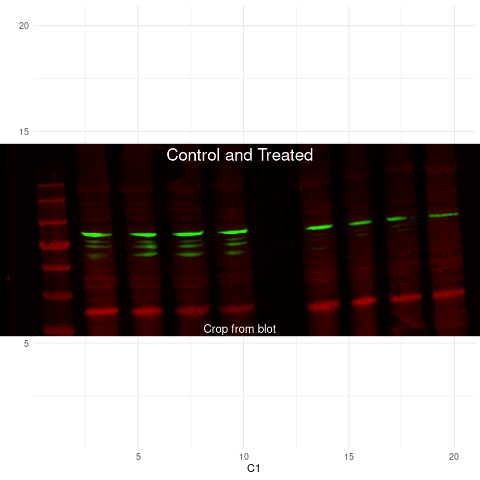

In [106]:
%%R
blot2

In [107]:
%%R
graph<-frame%>%ggplot(aes(C1, C2))+theme_nothing()
img<-a_text%>%image_draw()
blot3<-ggdraw()+draw_plot(graph)+draw_image(img)

#Here we have changed the theme

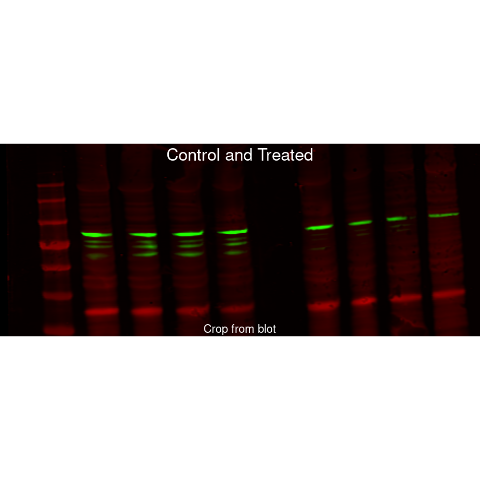

In [108]:
%%R
blot3

#Now we have an empty graph that we could annotate futher